In [6]:
import numpy as np
import functools
from matplotlib import pyplot as plt
import simulate_euler

In [17]:
x0 = simulate_euler.fitzhugh_nagumo_stable_point
dt = 0.01

In [3]:
def model_with_input(I):
    return functools.partial(simulate_euler.fitzhugh_nagumo_dx, I=I)

## FitzHugh-Nagumo f-I curve

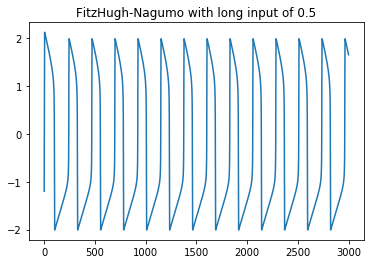

In [21]:
Tmax=3000
x, y = simulate_euler.simulate(model_with_input(0.5), x0, dt, Tmax=Tmax).T
plt.plot(np.arange(0, Tmax, dt), x)
plt.title("FitzHugh-Nagumo with long input of 0.5")
plt.show()

In [36]:
def count_spikes(x, A=1.5):
    mask = x > A
    diff = mask[1:] > mask[:-1]
    spikes = diff.sum()
    if spikes > 0:
        return spikes - 1
    return 0

In [38]:
print(f"Long input of 0.5 resulted in {count_spikes(x)} spikes.")

Long input of 0.5 resulted in 13 spikes.


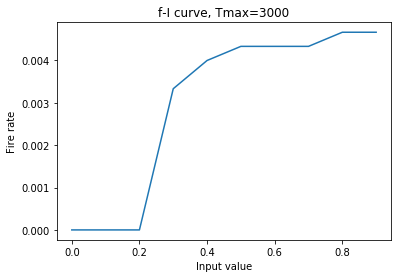

In [42]:
I_range = np.arange(0, 1, 0.1)
fire_rate = np.zeros(I_range.size)
for j, I in enumerate(I_range):
    x, y = simulate_euler.simulate(model_with_input(I), x0, dt, Tmax=Tmax).T
    n_spikes = count_spikes(x)
    rate = n_spikes / Tmax
    fire_rate[j] = rate
plt.plot(I_range, fire_rate)
plt.xlabel('Input value')
plt.ylabel('Fire rate')
plt.title(f'f-I curve, Tmax={Tmax}')
plt.show()

## FitzHugh-Nagumo post inhibitory rebound

After 50 time steps with negative input, system went from (-1.2, -0.62) to [-1.56525116 -0.78858609]


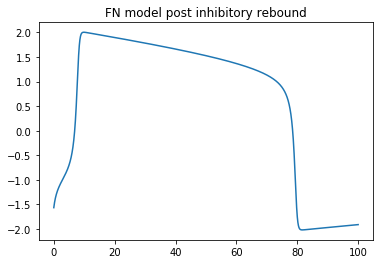

In [68]:
Tinhibition = 50
x0_inhibited = simulate_euler.simulate(model_with_input(-0.5), x0, dt, Tmax=Tinhibition)[-1]
print(f"After {Tinhibition} time steps with negative input, system went from {x0} to {x0_inhibited}")
Tmax=100
t_axis = np.arange(0, Tmax, dt)
x, y = simulate_euler.simulate(model_with_input(0), x0_inhibited, dt, Tmax=Tmax).T
plt.plot(t_axis, x)
plt.title("FN model post inhibitory rebound")
plt.show()

## LIF f-I curve

In [114]:
def model_lif(dt, Tmax, I, tau_m=10, C_m=0.25, v_eq=-65, v_th=-50, v_reset=-65):
    lif_dv = lambda v: -(v - v_eq)/tau_m + I/C_m
    t_axis = np.arange(dt, Tmax, dt)
    v = v_eq
    spikes = []
    for t in t_axis:
        v = simulate_euler.simulate(lif_dv, v, dt, 2*dt)[-1]
        if v > v_th:
            v = v_reset
            spikes.append(t)
    return spikes

In [180]:
def lif_analytical_fI(I, tau_m=10, C_m=0.25, V_eq=-65, V_th=-50, V_reset=-65):
    R_m = tau_m / C_m
    V_inf = V_eq + R_m * I
    valid_idx = np.where(((V_inf > V_reset) & (V_inf > V_th)) | ((V_inf < V_reset) & (V_inf < V_th)))
    T = tau_m * np.log((V_inf[valid_idx] - V_reset) / (V_inf[valid_idx] - V_th))
    f = np.zeros(I.size)
    f[valid_idx] = 1/T
    
    return f

In [185]:
Tmax = 1000
I_range = np.arange(0, 1, 0.1)
simulated_rates = np.zeros(I_range.size)
for j, I in enumerate(I_range):
    spikes = model_lif(0.1, Tmax=Tmax, I=I)
    simulated_rates[j] = len(spikes) / Tmax

In [181]:
analytical_rates = lif_analytical_fI(I_range)

array([0.        , 0.        , 0.        , 0.        , 0.03606738,
       0.07213475, 0.10195454, 0.13033474, 0.15809713, 0.18552996])

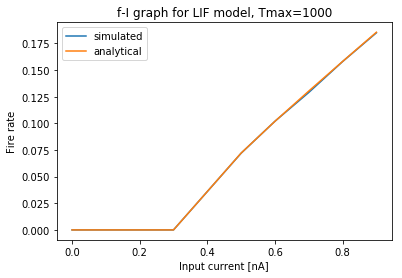

In [193]:
plt.plot(I_range, simulated_rates)
plt.plot(I_range, analytical_rates)
plt.legend(['simulated', 'analytical'])
plt.xlabel('Input current [nA]')
plt.ylabel('Fire rate')
plt.title(f"f-I graph for LIF model, Tmax={Tmax}")
plt.show()